In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import re

In [ ]:
def get_graph_data(log_file, ys_file, label, metric='proc.cpu_percent', min_bot=0, max_bot=300, resample=1, smooth_function=lambda x: x, bot_peak=300) -> pd.DataFrame:
    data =  pd.read_csv(log_file, usecols= ['timestamp', metric], sep='\t', header=0)
    ys = pd.read_csv(ys_file, sep='\t', names=["timestamp", "b", "playerNum"])
    max_timestamp = ys['timestamp'][(ys['playerNum'] > bot_peak-1).idxmax()] // 1000

    data_ = data[(data['timestamp'] // 1000 >= ys.iat[0, 0] // 1000) & (data['timestamp'] // 1000 <= max_timestamp if max_timestamp != 0 else True)]
    data_.index = np.arange(1, len(data_) + 1)
    data_ = data_.drop(columns=['timestamp'])
    data_.columns= [label]

    data_ = data_[min_bot:max_bot]

    data_ = data_.apply(smooth_function)

    data_ = data_.iloc[::resample, :]

    return data_


In [ ]:
def get_spigot_cpu_graph():
    metric = 'proc.cpu_percent'
    min_bot=25
    max_bot=300
    resample=5
    smooth_function=lambda x: savgol_filter(x,15,2)


    data1 = get_graph_data('./data/1/log.txt', './data/1/yardstick-metrics.log', 'Yardstick Walk', metric, min_bot, max_bot, resample, smooth_function)
    data2 = get_graph_data('./data/2/log.txt', './data/2/yardstick-metrics.log', 'Samovar', metric, min_bot, max_bot, resample)
    data3 = get_graph_data('./data/3/log.txt', './data/3/yardstick-metrics.log', 'Agent-based', metric, min_bot, max_bot, resample)

    sns.lineplot(data1, palette=['r'],marker="o")
    sns.lineplot(data2, palette=['b'],marker="^")
    plot = sns.lineplot(data3, palette=['g'],marker="D")
    plot.set(xlabel='Number of Bots', ylabel='CPU Utilization(%)')
    plot.get_figure().savefig("./report/spigot_cpu.pdf")
    plt.figure()

    return data1, data2, data3
get_spigot_cpu_graph()

(     Yardstick Walk
 1              0.21
 6              2.30
 11             3.33
 16             3.79
 21             4.49
 26             4.37
 31             4.58
 36             5.40
 41             5.24
 46            13.21
 51             6.74
 56             6.75
 61             6.89
 66             7.57
 71             8.08
 76             9.04
 81             9.34
 86             9.82
 91            10.51
 96            11.65
 101           12.66
 106           12.21
 111           14.14
 116           13.56
 121           14.33
 126           16.39
 131           15.38
 136           16.11
 141           12.89
 146           17.11
 151           16.35
 156           19.48
 161           26.38
 166           14.09
 171           13.46
 176           15.04
 181            9.27
 186           12.41
 191           20.42
 196           25.95
 201           11.11
 206           11.15
 211           11.32
 216           51.12
 221           26.46
 226           12.06
 231         

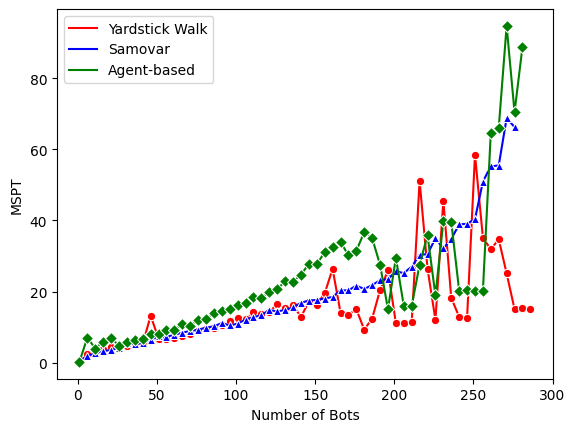

<Figure size 640x480 with 0 Axes>

In [61]:
def get_spigot_mspt_graph():
    metric = 'mspt'
    min_bot=0
    max_bot=300
    resample=5

    data1 = get_graph_data('./data/1/log.txt', './data/1/yardstick-metrics.log', 'Yardstick Walk', metric, min_bot, max_bot, resample)
    data2 = get_graph_data('./data/2/log.txt', './data/2/yardstick-metrics.log', 'Samovar', metric, min_bot, max_bot, resample)
    data3 = get_graph_data('./data/3/log.txt', './data/3/yardstick-metrics.log', 'Agent-based', metric, min_bot, max_bot, resample)

    sns.lineplot(data1, palette=['r'],marker="o")
    sns.lineplot(data2, palette=['b'],marker="^")
    plot = sns.lineplot(data3, palette=['g'],marker="D")
    plot.set(xlabel='Number of Bots', ylabel='MSPT')
    plot.get_figure().savefig("./report/spigot_mspt.pdf")
    plt.figure()

    return data1, data2, data3
get_spigot_mspt_graph()

In [ ]:
def get_opencraft_cpu_graph():
    metric = 'proc.cpu_percent'
    min_bot=0
    max_bot=300
    resample=5
    smooth_function=lambda x: savgol_filter(x,10,1)
    bot_peak=200

    data1 = get_graph_data('./data/4/log.txt', './data/4/yardstick-metrics.log', 'Yardstick Walk', metric, min_bot, max_bot, resample, smooth_function, bot_peak)
    data2 = get_graph_data('./data/5/log.txt', './data/5/yardstick-metrics.log', 'Samovar', metric, min_bot, max_bot, resample, smooth_function, bot_peak)
    data3 = get_graph_data('./data/6/log.txt', './data/6/yardstick-metrics.log', 'Agent-based', metric, min_bot, max_bot, resample, smooth_function, bot_peak)

    sns.lineplot(data1, palette=['r'],marker="o")
    sns.lineplot(data2, palette=['b'],marker="^")
    plot = sns.lineplot(data3, palette=['g'],marker="D")
    plot.set(xlabel='Number of Bots', ylabel='CPU Utilization(%)')
    plot.get_figure().savefig("./report/opencraft_cpu.pdf")
    plt.figure()

    return data1, data2, data3 
get_opencraft_cpu_graph()

In [ ]:
def get_samovar_cpu_graph():
    metric = 'proc.cpu_percent'
    min_bot=0
    max_bot=300
    resample=5
    smooth_function=lambda x: savgol_filter(x,5,1)

    data1 = get_graph_data('./data/2/log.txt', './data/2/yardstick-metrics.log', 'Spigot', metric, min_bot, max_bot, resample, smooth_function)
    data2 = get_graph_data('./data/5/log.txt', './data/5/yardstick-metrics.log', 'Opencraft', metric, min_bot, max_bot, resample, smooth_function)

    sns.lineplot(data1, palette=['r'],marker="o")
    plot = sns.lineplot(data2, palette=['b'],marker="^")
    plot.set(xlabel='Number of Bots', ylabel='CPU Utilization(%)')
    plot.get_figure().savefig("./report/samovar_cpu.pdf")
    plt.figure()

    return data1, data2
get_samovar_cpu_graph()

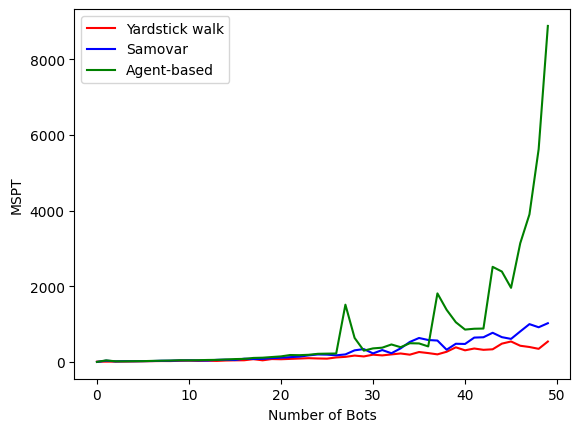

<Figure size 640x480 with 0 Axes>

In [85]:
def get_opencraft_tick_graph():
    def get_oc_data(log_file, ys_file, name, min_bot=0, max_bot=300, resample=1, smooth_function=lambda x: x, bot_peak=300):
        raw = []
        data =  pd.read_csv(log_file, sep='\t', header=0)
        data = data[data['key'] == 'tick']
        ys = pd.read_csv(ys_file, sep='\t', names=["timestamp", "b", "playerNum"])
        max_timestamp = ys['timestamp'][(ys['playerNum'] > bot_peak - 1).idxmax()]
        data = data[(data['timestamp'] // 1000 >= ys.iat[0, 0] // 1000) & (data['timestamp'] // 1000 <= max_timestamp if max_timestamp != 0 else True)]

        keys = []
        for time in data['timestamp']:
            if time // 1000 not in keys:
                keys.append(time // 1000)

        # get mean for each second
        for k in keys:
            raw.append(data[(data['timestamp'] // 1000 == k)]['value'].mean())

        df = pd.DataFrame(raw)
        df.columns= [name]
        return df[:40]


    data1 = get_oc_data('./data/4/opencraft-events.log', './data/4/yardstick-metrics.log', "Yardstick walk")
    data2 = get_oc_data('./data/5/opencraft-events.log', './data/5/yardstick-metrics.log', "Samovar")
    data3 = get_oc_data('./data/6/opencraft-events.log', './data/6/yardstick-metrics.log', "Agent-based", bot_peak=239)
    sns.lineplot(data1, palette=['r'])
    sns.lineplot(data2, palette=['b'])
    plot = sns.lineplot(data3, palette=['g'])
    plot.set(xlabel='Number of Bots', ylabel='MSPT')
    plot.get_figure().savefig("./report/opencraft_mspt.pdf")
    plt.figure()

get_opencraft_tick_graph()


In [ ]:
get_spigot_cpu_graph()
get_spigot_mspt_graph()
get_opencraft_cpu_graph()
get_samovar_cpu_graph()
get_opencraft_tick_graph()

<Figure size 640x480 with 0 Axes>

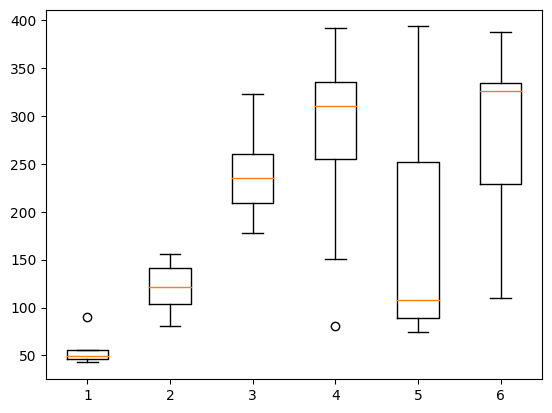

<Figure size 640x480 with 0 Axes>

In [64]:
metric = 'proc.cpu_percent'
min_bot=25
max_bot=300
resample=5
smooth_function=lambda x: savgol_filter(x,15,2)


data1 = get_graph_data('./data/1/log.txt', './data/1/yardstick-metrics.log', 'Yardstick Walk', metric, min_bot, max_bot, resample, smooth_function)
data2 = get_graph_data('./data/2/log.txt', './data/2/yardstick-metrics.log', 'Samovar', metric, min_bot, max_bot, resample)
data3 = get_graph_data('./data/3/log.txt', './data/3/yardstick-metrics.log', 'Agent-based', metric, min_bot, max_bot, resample)

# sns.lineplot(data1, palette=['r'],marker="o")
# sns.lineplot(data2, palette=['b'],marker="^")
# plot = sns.lineplot(data3, palette=['g'],marker="D")
# plot.set(xlabel='Number of Bots', ylabel='CPU Utilization(%)')
# plot.get_figure().savefig("./report/spigot_cpu.pdf")
box_data = []
# for i in range(max_bot // 50):
#     if (i + 1) * 50 > max_bot:
#         box_data.append([d[0] for d in data1.iloc[lambda x: x.index > i * 50].values])
#     else:
#         box_data.append([d[0] for d in data1.iloc[lambda x: (x.index > i * 50) & (x.index <= ((i + 1) * 50))].values])

# for i in range(max_bot // 50):
#     if (i + 1) * 50 > max_bot:
#         box_data.append([d[0] for d in data2.iloc[lambda x: x.index > i * 50].values])
#     else:
#         box_data.append([d[0] for d in data2.iloc[lambda x: (x.index > i * 50) & (x.index <= ((i + 1) * 50))].values])

for i in range(max_bot // 50):
    if (i + 1) * 50 > max_bot:
        box_data.append([d[0] for d in data3.iloc[lambda x: x.index > i * 50].values])
    else:
        box_data.append([d[0] for d in data3.iloc[lambda x: (x.index > i * 50) & (x.index <= ((i + 1) * 50))].values])
plt.boxplot(box_data)
plt.figure()